# SkySentry Frame Fetching Demo

This notebook demonstrates how to use the SkySentry API to fetch frames from connected clients.
Make sure the SkySentry backend is running on demo8080.shivi.io before running these cells.

In [26]:
# Import the fetch_frame functions
from fetch_frame import get_clients, get_frame, get_frame_info
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time

In [27]:
# Get all connected clients
print("🔍 Fetching connected clients...")
clients = get_clients()
print(f"📡 Found {len(clients)} connected clients: {clients}")

if not clients:
    print("⚠️ No clients found. Make sure:")
    print("   1. SkySentry backend is running on demo8080.shivi.io")
    print("   2. At least one capture client is connected and streaming")
else:
    print("✅ Ready to fetch frames!")

🔍 Fetching connected clients...
📡 Found 2 connected clients: ['demo-client-412437', 'demo-client-772814']
✅ Ready to fetch frames!


In [28]:
# Get frame information for each client
if clients:
    print("📊 Frame Information for All Clients:")
    print("=" * 50)
    
    for client_id in clients:
        print(f"\n🔸 Client: {client_id}")
        info = get_frame_info(client_id)
        
        if info:
            print(f"   Timestamp: {info['timestamp']}")
            print(f"   Size: {info['size']:,} bytes")
            print(f"   Stats: {info['stats']}")
        else:
            print(f"   ❌ No frame data available")
else:
    print("⚠️ No clients available to check frame info")

📊 Frame Information for All Clients:

🔸 Client: demo-client-412437
   Timestamp: 2025-09-20T10:43:54.791483551+02:00
   Size: 1,792 bytes
   Stats: {'capacity': 16, 'frameCount': 1341, 'latestTimestamp': '2025-09-20T10:43:54.791483551+02:00', 'size': 16}

🔸 Client: demo-client-772814
   Timestamp: 2025-09-20T10:43:54.783936122+02:00
   Size: 29,872 bytes
   Stats: {'capacity': 16, 'frameCount': 52606, 'latestTimestamp': '2025-09-20T10:43:54.783936122+02:00', 'size': 16}


📸 Fetching frame from client: demo-client-412437
✅ Successfully fetched frame:
   Size: (360, 480) pixels
   Mode: RGB
   Format: JPEG


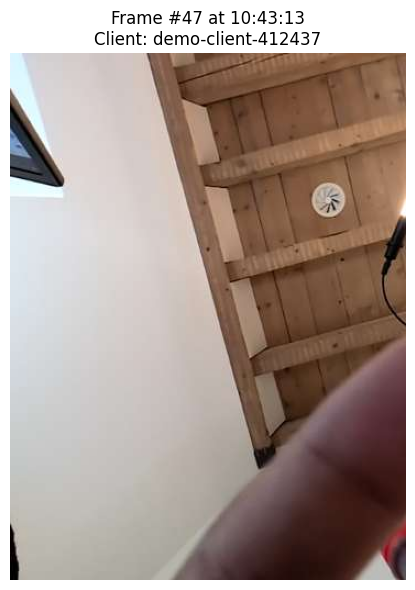

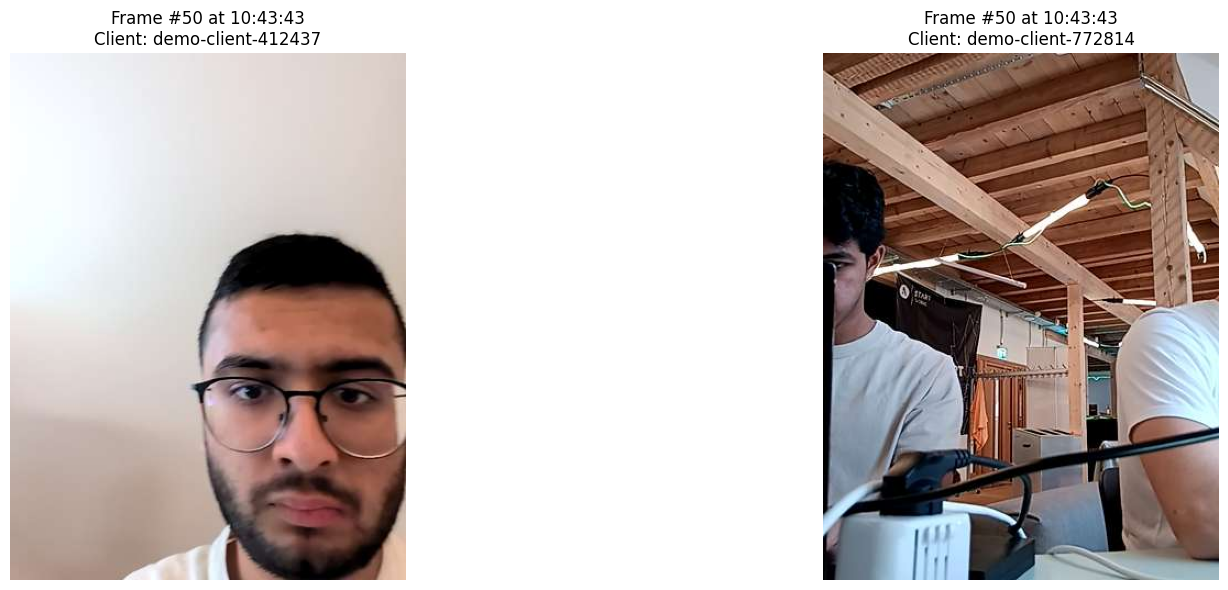

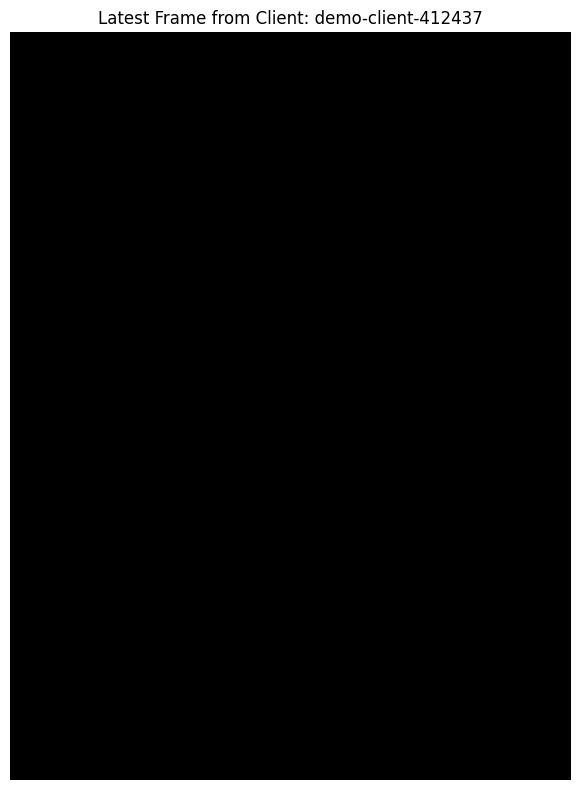

In [29]:
# Fetch and display frame from the first available client
if clients:
    client_id = clients[0]  # Use first client
    print(f"📸 Fetching frame from client: {client_id}")
    
    frame = get_frame(client_id)
    
    if frame:
        print(f"✅ Successfully fetched frame:")
        print(f"   Size: {frame.size} pixels")
        print(f"   Mode: {frame.mode}")
        print(f"   Format: {frame.format}")
        
        # Display the frame
        plt.figure(figsize=(12, 8))
        plt.imshow(frame)
        plt.title(f"Latest Frame from Client: {client_id}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"❌ Failed to fetch frame from {client_id}")
else:
    print("⚠️ No clients available to fetch frames from")

📸 Fetching frames from all 2 clients...
✅ Got frame from demo-client-412437: (360, 480)
✅ Got frame from demo-client-772814: (360, 480)


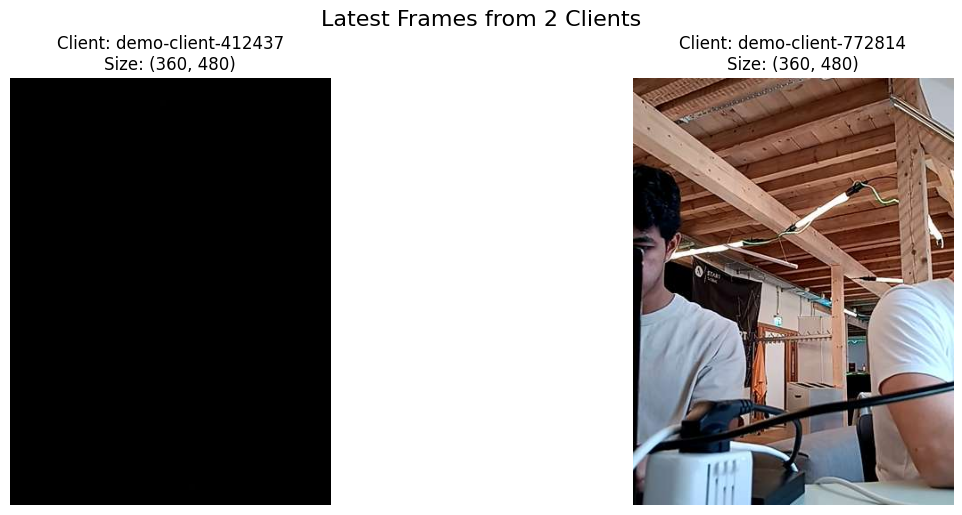

In [30]:
# Fetch and display frames from all clients in a grid
if clients:
    print(f"📸 Fetching frames from all {len(clients)} clients...")
    
    frames = []
    valid_clients = []
    
    for client_id in clients:
        frame = get_frame(client_id)
        if frame:
            frames.append(frame)
            valid_clients.append(client_id)
            print(f"✅ Got frame from {client_id}: {frame.size}")
        else:
            print(f"❌ No frame from {client_id}")
    
    if frames:
        # Create subplot grid
        n_frames = len(frames)
        cols = min(3, n_frames)  # Max 3 columns
        rows = (n_frames + cols - 1) // cols  # Ceiling division
        
        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        if n_frames == 1:
            axes = [axes]
        elif rows == 1:
            axes = axes if isinstance(axes, np.ndarray) else [axes]
        else:
            axes = axes.flatten()
        
        for i, (frame, client_id) in enumerate(zip(frames, valid_clients)):
            axes[i].imshow(frame)
            axes[i].set_title(f"Client: {client_id}\nSize: {frame.size}")
            axes[i].axis('off')
        
        # Hide empty subplots
        for i in range(len(frames), len(axes)):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.suptitle(f"Latest Frames from {len(frames)} Clients", y=1.02, fontsize=16)
        plt.show()
    else:
        print("❌ No frames could be fetched from any client")
else:
    print("⚠️ No clients available")

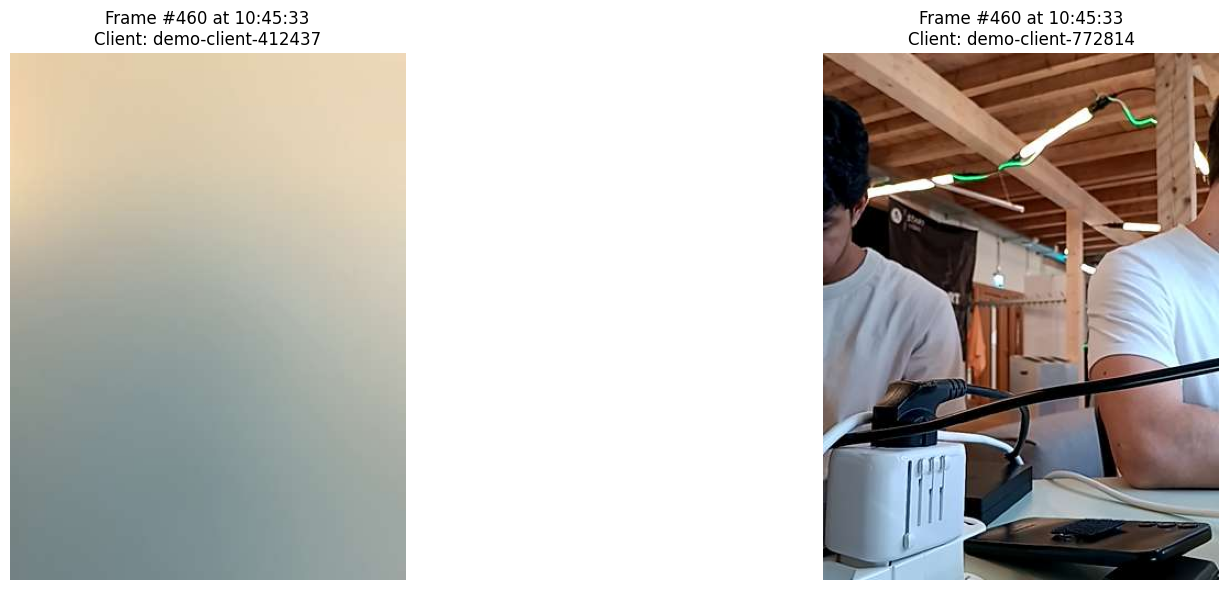

📸 Frame #460 fetched at 10:45:33 from 2 client(s)


In [ ]:
# Real-time frame fetching demo with multiple clients side by side
if clients:
    # Determine number of clients to display (max 2 or number of clients if less)
    num_display_clients = min(len(clients), 2)
    display_clients = clients[:num_display_clients]
    
    print(f"🔄 Starting real-time demo for {num_display_clients} client(s): {display_clients}")
    print("Note: This will fetch and display frames every 0.01 second for 600 seconds")
    print("You can interrupt this cell to stop early\n")
    
    start_time = time.time()
    frame_count = 0
    
    # Import IPython display for better notebook support
    from IPython.display import display, clear_output
    import matplotlib.pyplot as plt
    
    try:
        while time.time() - start_time < 600:  # Run for 600 seconds
            frames = []
            valid_clients = []
            
            # Fetch frames from all display clients
            for client_id in display_clients:
                frame = get_frame(client_id)
                if frame:
                    frames.append(frame)
                    valid_clients.append(client_id)
            
            if frames:
                frame_count += 1
                current_time = datetime.now().strftime("%H:%M:%S")
                
                # Clear previous output and display new frames
                clear_output(wait=True)
                
                # Create subplot for side-by-side display
                fig, axes = plt.subplots(1, len(frames), figsize=(10 * len(frames), 6))
                
                # Handle single frame case
                if len(frames) == 1:
                    axes = [axes]
                
                for i, (frame, client_id) in enumerate(zip(frames, valid_clients)):
                    axes[i].imshow(frame)
                    axes[i].set_title(f"Frame #{frame_count} at {current_time}\nClient: {client_id}")
                    axes[i].axis('off')
                
                plt.tight_layout()
                
                display(fig)
                plt.close(fig)  # Important: close figure to free memory
                
                print(f"📸 Frame #{frame_count} fetched at {current_time} from {len(frames)} client(s)")
            else:
                print(f"❌ Failed to fetch frames at {datetime.now().strftime('%H:%M:%S')}")
            
            time.sleep(0.01)  # Wait 0.01 second between frames
            
    except KeyboardInterrupt:
        print("\n⏹️ Demo interrupted by user")
    
    print(f"\n✅ Demo completed. Fetched {frame_count} frame sets in {time.time() - start_time:.1f} seconds")
else:
    print("⚠️ No clients available for real-time demo")